# Data Exploration
 

## Importation des Bibliothèques

In [10]:
import pandas as pd
import numpy as np
import pygwalker as pyg
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.patches as patches
import cv2
import os

ModuleNotFoundError: No module named 'cv2'

In [11]:
!pip install install 

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


# Chargement du Dataset

In [ ]:
df = pd.read_csv('/work/meta_df.csv')

# Analyse Exploratoire des données

## Premières lignes pour obtenir un aperçu des données.

In [ ]:
df.head()

img_id  img_width  img_height            img_file  cat_id  \
0       0       1537        2049  batch_1/000006.jpg       6   
1       1       1537        2049  batch_1/000008.jpg      18   
2       1       1537        2049  batch_1/000008.jpg      14   
3       2       1537        2049  batch_1/000010.jpg       5   
4       2       1537        2049  batch_1/000010.jpg       7   

               cat_name supercategory  ann_id      x      y   width  height  \
0          Glass bottle        Bottle       1  517.0  127.0   447.0  1322.0   
1           Meal carton        Carton       2    1.0  457.0  1429.0  1519.0   
2          Other carton        Carton       3  531.0  292.0  1006.0   672.0   
3  Clear plastic bottle        Bottle       4  632.0  987.0   500.0   374.0   
4    Plastic bottle cap    Bottle cap       5  632.0  989.0    44.0    51.0   

        area  
0   403954.0  
1  1071259.5  
2    99583.5  
3    73832.5  
4      915.0

## Nombre de lignes et de colonnes

In [ ]:
df.shape

(4784, 13)

## Résumé des types de données et des valeurs manquantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_id         4784 non-null   int64  
 1   img_width      4784 non-null   int64  
 2   img_height     4784 non-null   int64  
 3   img_file       4784 non-null   object 
 4   cat_id         4784 non-null   int64  
 5   cat_name       4784 non-null   object 
 6   supercategory  4784 non-null   object 
 7   ann_id         4784 non-null   int64  
 8   x              4784 non-null   float64
 9   y              4784 non-null   float64
 10  width          4784 non-null   float64
 11  height         4784 non-null   float64
 12  area           4784 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 486.0+ KB


## Statistiques pour les colonnes numériques

In [ ]:
df.describe

<bound method NDFrame.describe of       img_id  img_width  img_height            img_file  cat_id  \
0          0       1537        2049  batch_1/000006.jpg       6   
1          1       1537        2049  batch_1/000008.jpg      18   
2          1       1537        2049  batch_1/000008.jpg      14   
3          2       1537        2049  batch_1/000010.jpg       5   
4          2       1537        2049  batch_1/000010.jpg       7   
...      ...        ...         ...                 ...     ...   
4779    1498       1824        4000  batch_9/000098.jpg      16   
4780    1498       1824        4000  batch_9/000098.jpg       7   
4781    1499       1824        4000  batch_9/000099.jpg      39   
4782    1499       1824        4000  batch_9/000099.jpg      14   
4783    1499       1824        4000  batch_9/000099.jpg       6   

                   cat_name          supercategory  ann_id          x  \
0              Glass bottle                 Bottle       1   517.0000   
1              

## Vérification si présence des valeurs manquantes

<AxesSubplot: title={'center': 'Missing Values'}>

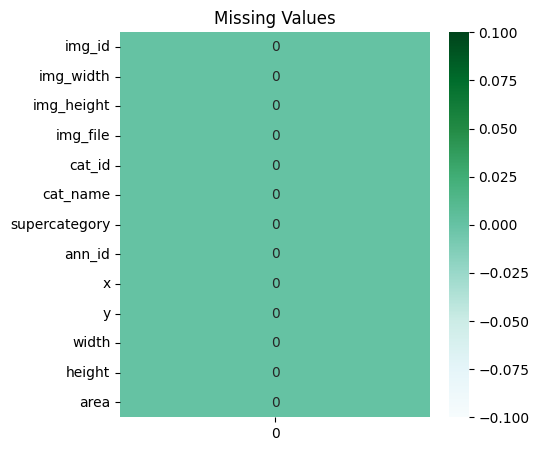

In [ ]:
#Valeurs nulles
fig, ax = plt.subplots(figsize=(5,5)) 
plt.title('Missing Values')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='BuGn')

<AxesSubplot: >

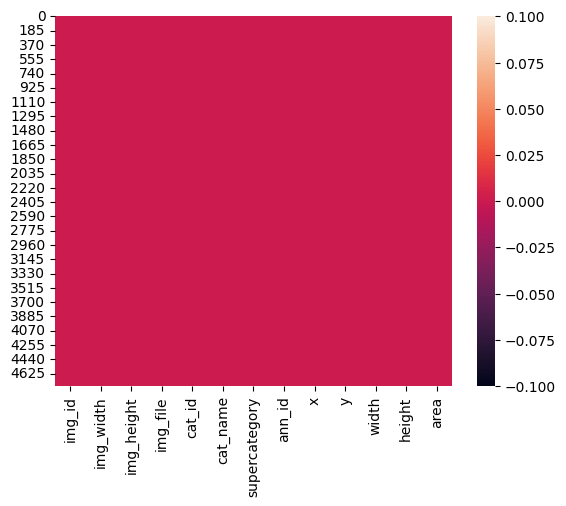

In [ ]:
#Headmap des valeurs manquantes
sns.heatmap(df.isna())

## Valeurs Dupliquées

In [ ]:
df.duplicated().sum()


0

# Visualisation

## 1- Distribution des tailles d'images

### Il est question de comprendre la variété des tailles d'images

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#b79a20","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"img_width","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"img_height","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## 2- Distribution d'images par catégories

### Il est question de voir ici quelles catégories sont les plus fréquentes ou moins représentées

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#83bcb6","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"cat_name","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## 3- Analyse des SuperCategories

### Répartition des supercatégories

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#bab0ac","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"supercategory","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## 4- Taille des Objets

### Variété des tailles d'objets dans nos images

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"area","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"x","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"y","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df3151b5-6b60-4a13-b0e6-37f2517c779c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>